In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import scipy as scipy
from scipy import optimize
from numpy import loadtxt
from lmfit import Model
from lmfit.models import LorentzianModel,PseudoVoigtModel
from numpy import exp, loadtxt, pi, sqrt
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from sklearn.linear_model import LinearRegression 

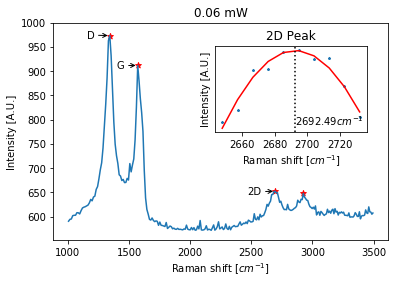

In [2]:
#Se definen los arrays de las gráficas
x_i = []
y_i = []

with open('EEG-A_1%.txt','r') as csvfile:
    file = csv.reader(csvfile, delimiter='\t')
    for row in file:
        x_i.append(float(row[0]))
        y_i.append(float(row[1]))
        
    peaks = find_peaks(y_i,prominence=30)[0]
    a=[x_i[j] for j in peaks]
    b=[y_i[j] for j in peaks]
    
    x=[]
    y=[]

    for k in range(len(x_i)):
        if x_i[k]>2640 and x_i[k]<2740:
            x.append(x_i[k])
            y.append(y_i[k])
#Forma de la gráfica 
fig, main_ax = plt.subplots()
main_ax.set_xlabel('Raman shift [$cm^{-1}$]')
main_ax.set_ylabel('Intensity [A.U.]')
main_ax.set_title('0.06 mW')

def lorentzian(x, amp, cen, wid):
    return (amp*wid**2/((x-cen)**2+wid**2))


gmodel = Model(lorentzian)
gmodel.param_names
gmodel.independent_vars
params = gmodel.make_params(cen=2700, amp=250, wid=12)
result = gmodel.fit(y, params, x=x)
#print(result.fit_report())
cen_1 = result.params['cen'].value
err_1 = result.params['cen'].stderr

right_inset_ax = fig.add_axes([0.5,0.5,0.35,0.3])
right_inset_ax.scatter(x,y,marker='*',s=5)
right_inset_ax.plot(x, result.best_fit, 'r-')
right_inset_ax.set_title('2D Peak')
#right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])
right_inset_ax.set_xlabel('Raman shift [$cm^{-1}$]')
right_inset_ax.set_ylabel('Intensity [A.U.]')
right_inset_ax.axvline(cen_1,linestyle='dotted',c='k')
right_inset_ax.annotate("{0:.2f}".format(cen_1)+'$cm^{-1}$',
            xy=(0,0), xycoords='axes fraction',
            xytext=(80, 5), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

main_ax.plot(x_i,y_i,label='1%')
main_ax.scatter(a,b,c='r',marker='*')
#main_ax.legend(prop={'size': 8}, frameon=False)
main_ax.annotate('D',
            xy=(a[0], b[0]), xycoords='data',
            xytext=(0.1, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('G',
            xy=(a[1], b[1]), xycoords='data',
            xytext=(0.19, 0.78), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('2D',
            xy=(a[2], b[2]), xycoords='data',
            xytext=(0.58, 0.2), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
fig.savefig('Raman_C1_1%.png',dpi=199)

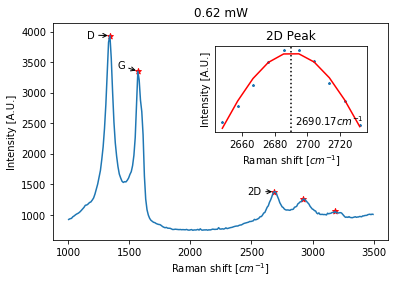

In [3]:
#Se definen los arrays de las gráficas
x_i = []
y_i = []

with open('EEG-A_10%.txt','r') as csvfile:
    file = csv.reader(csvfile, delimiter='\t')
    for row in file:
        x_i.append(float(row[0]))
        y_i.append(float(row[1]))
        
    peaks = find_peaks(y_i,prominence=30)[0]
    a=[x_i[j] for j in peaks]
    b=[y_i[j] for j in peaks]
    
    x=[]
    y=[]

    for k in range(len(x_i)):
        if x_i[k]>2640 and x_i[k]<2740:
            x.append(x_i[k])
            y.append(y_i[k])
#Forma de la gráfica 
fig, main_ax = plt.subplots()
main_ax.set_xlabel('Raman shift [$cm^{-1}$]')
main_ax.set_ylabel('Intensity [A.U.]')
main_ax.set_title('0.62 mW')

def lorentzian(x, amp, cen, wid):
    return (amp*wid**2/((x-cen)**2+wid**2))

gmodel = Model(lorentzian)
gmodel.param_names
gmodel.independent_vars
params = gmodel.make_params(cen=2700, amp=250, wid=12)
result = gmodel.fit(y, params, x=x)
#print(result.fit_report())
cen_10 = result.params['cen'].value
err_10 = result.params['cen'].stderr

right_inset_ax = fig.add_axes([0.5,0.5,0.35,0.3])
right_inset_ax.scatter(x,y,marker='*',s=5)
right_inset_ax.plot(x, result.best_fit, 'r-')
right_inset_ax.set_title('2D Peak')
#right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])
right_inset_ax.set_xlabel('Raman shift [$cm^{-1}$]')
right_inset_ax.set_ylabel('Intensity [A.U.]')
right_inset_ax.axvline(cen_10,linestyle='dotted',c='k')
right_inset_ax.annotate("{0:.2f}".format(cen_10)+'$cm^{-1}$',
            xy=(0,0), xycoords='axes fraction',
            xytext=(80, 5), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

main_ax.plot(x_i,y_i,label='10%')
main_ax.scatter(a,b,c='r',marker='*')
#main_ax.legend(prop={'size': 8}, frameon=False)
main_ax.annotate('D',
            xy=(a[0], b[0]), xycoords='data',
            xytext=(0.1, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('G',
            xy=(a[1], b[1]), xycoords='data',
            xytext=(0.19, 0.78), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('2D',
            xy=(a[2], b[2]), xycoords='data',
            xytext=(0.58, 0.2), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
fig.savefig('Raman_C1_10%.png',dpi=199)

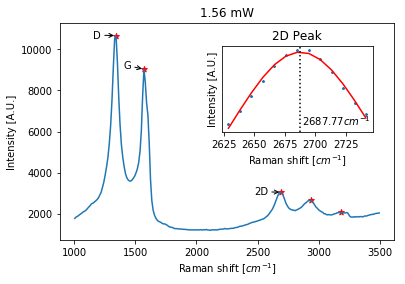

In [4]:
#Se definen los arrays de las gráficas
x_i = []
y_i = []

with open('EEG-A_25%.txt','r') as csvfile:
    file = csv.reader(csvfile, delimiter='\t')
    for row in file:
        x_i.append(float(row[0]))
        y_i.append(float(row[1]))
        
    peaks = find_peaks(y_i,prominence=30)[0]
    a=[x_i[j] for j in peaks]
    b=[y_i[j] for j in peaks]
    
    x=[]
    y=[]

    for k in range(len(x_i)):
        if x_i[k]>2625 and x_i[k]<2750:
            x.append(x_i[k])
            y.append(y_i[k])
#Forma de la gráfica 
fig, main_ax = plt.subplots()
main_ax.set_xlabel('Raman shift [$cm^{-1}$]')
main_ax.set_ylabel('Intensity [A.U.]')
main_ax.set_title('1.56 mW')

def lorentzian(x, amp, cen, wid):
    return (amp*wid**2/((x-cen)**2+wid**2))

gmodel = Model(lorentzian)
gmodel.param_names
gmodel.independent_vars
params = gmodel.make_params(cen=2700, amp=250, wid=12)
result = gmodel.fit(y, params, x=x)
#print(result.fit_report())
cen_25 = result.params['cen'].value
err_25 = result.params['cen'].stderr

right_inset_ax = fig.add_axes([0.5,0.5,0.35,0.3])
right_inset_ax.scatter(x,y,marker='*',s=5)
right_inset_ax.plot(x, result.best_fit, 'r-')
right_inset_ax.set_title('2D Peak')
#right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])
right_inset_ax.set_xlabel('Raman shift [$cm^{-1}$]')
right_inset_ax.set_ylabel('Intensity [A.U.]')
right_inset_ax.axvline(cen_25,linestyle='dotted',c='k')
right_inset_ax.annotate("{0:.2f}".format(cen_25)+'$cm^{-1}$',
            xy=(0,0), xycoords='axes fraction',
            xytext=(80, 5), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

main_ax.plot(x_i,y_i,label='25%')
main_ax.scatter(a,b,c='r',marker='*')
#main_ax.legend(prop={'size': 8}, frameon=False)
main_ax.annotate('D',
            xy=(a[0], b[0]), xycoords='data',
            xytext=(0.1, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('G',
            xy=(a[1], b[1]), xycoords='data',
            xytext=(0.19, 0.78), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('2D',
            xy=(a[2], b[2]), xycoords='data',
            xytext=(0.58, 0.2), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
fig.savefig('Raman_C1_25%.png',dpi=199)

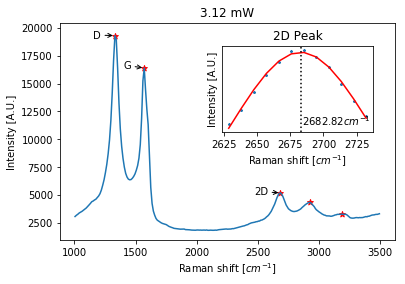

In [5]:
#Se definen los arrays de las gráficas
x_i = []
y_i = []

with open('EEG-A_50%.txt','r') as csvfile:
    file = csv.reader(csvfile, delimiter='\t')
    for row in file:
        x_i.append(float(row[0]))
        y_i.append(float(row[1]))
        
    peaks = find_peaks(y_i,prominence=30)[0]
    a=[x_i[j] for j in peaks]
    b=[y_i[j] for j in peaks]
    
    x=[]
    y=[]

    for k in range(len(x_i)):
        if x_i[k]>2620 and x_i[k]<2740:
            x.append(x_i[k])
            y.append(y_i[k])
#Forma de la gráfica 
fig, main_ax = plt.subplots()
main_ax.set_xlabel('Raman shift [$cm^{-1}$]')
main_ax.set_ylabel('Intensity [A.U.]')
main_ax.set_title('3.12 mW')

def lorentzian(x, amp, cen, wid):
    return (amp*wid**2/((x-cen)**2+wid**2))

gmodel = Model(lorentzian)
gmodel.param_names
gmodel.independent_vars
params = gmodel.make_params(cen=2700, amp=250, wid=12)
result = gmodel.fit(y, params, x=x)
#print(result.fit_report())
cen_50 = result.params['cen'].value
err_50 = result.params['cen'].stderr

right_inset_ax = fig.add_axes([0.5,0.5,0.35,0.3])
right_inset_ax.scatter(x,y,marker='*',s=5)
right_inset_ax.plot(x, result.best_fit, 'r-')
right_inset_ax.set_title('2D Peak')
#right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])
right_inset_ax.set_xlabel('Raman shift [$cm^{-1}$]')
right_inset_ax.set_ylabel('Intensity [A.U.]')
right_inset_ax.axvline(cen_50,linestyle='dotted',c='k')
right_inset_ax.annotate("{0:.2f}".format(cen_50)+'$cm^{-1}$',
            xy=(0,0), xycoords='axes fraction',
            xytext=(80, 5), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

main_ax.plot(x_i,y_i,label='50%')
main_ax.scatter(a,b,c='r',marker='*')
#main_ax.legend(prop={'size': 8}, frameon=False)
main_ax.annotate('D',
            xy=(a[0], b[0]), xycoords='data',
            xytext=(0.1, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('G',
            xy=(a[1], b[1]), xycoords='data',
            xytext=(0.19, 0.78), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('2D',
            xy=(a[2], b[2]), xycoords='data',
            xytext=(0.58, 0.2), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
fig.savefig('Raman_C1_50%.png',dpi=199)

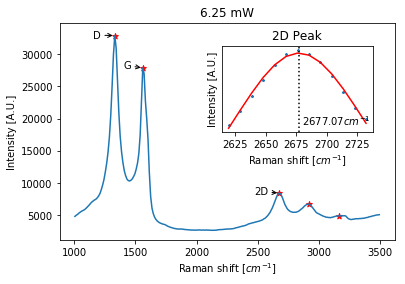

In [6]:
#Se definen los arrays de las gráficas
x_i = []
y_i = []

with open('EEG-A_100%.txt','r') as csvfile:
    file = csv.reader(csvfile, delimiter='\t')
    for row in file:
        x_i.append(float(row[0]))
        y_i.append(float(row[1]))
        
    peaks = find_peaks(y_i,prominence=50)[0]
    a=[x_i[j] for j in peaks]
    b=[y_i[j] for j in peaks]
    
    x=[]
    y=[]

    for k in range(len(x_i)):
        if x_i[k]>2610 and x_i[k]<2740:
            x.append(x_i[k])
            y.append(y_i[k])
#Forma de la gráfica 
fig, main_ax = plt.subplots()
main_ax.set_xlabel('Raman shift [$cm^{-1}$]')
main_ax.set_ylabel('Intensity [A.U.]')
main_ax.set_title('6.25 mW')

def lorentzian(x, amp, cen, wid):
    return (amp*wid**2/((x-cen)**2+wid**2))

gmodel = Model(lorentzian)
gmodel.param_names
gmodel.independent_vars
params = gmodel.make_params(cen=2700, amp=250, wid=12)
result = gmodel.fit(y, params, x=x)
#print(result.fit_report())
cen_100 = result.params['cen'].value
err_100 = result.params['cen'].stderr

right_inset_ax = fig.add_axes([0.5,0.5,0.35,0.3])
right_inset_ax.scatter(x,y,marker='*',s=5)
right_inset_ax.plot(x, result.best_fit, 'r-')
right_inset_ax.set_title('2D Peak')
#right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])
right_inset_ax.set_xlabel('Raman shift [$cm^{-1}$]')
right_inset_ax.set_ylabel('Intensity [A.U.]')
right_inset_ax.axvline(cen_100,linestyle='dotted',c='k')
right_inset_ax.annotate("{0:.2f}".format(cen_100)+'$cm^{-1}$',
            xy=(0,0), xycoords='axes fraction',
            xytext=(80, 5), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')

main_ax.plot(x_i,y_i,label='100%')
main_ax.scatter(a,b,c='r',marker='*')
#main_ax.legend(prop={'size': 8}, frameon=False)
main_ax.annotate('D',
            xy=(a[0], b[0]), xycoords='data',
            xytext=(0.1, 0.92), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('G',
            xy=(a[1], b[1]), xycoords='data',
            xytext=(0.19, 0.78), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
main_ax.annotate('2D',
            xy=(a[2], b[2]), xycoords='data',
            xytext=(0.58, 0.2), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",facecolor='black'),
            horizontalalignment='left', verticalalignment='bottom')
fig.savefig('Raman_C1_100%.png',dpi=199)

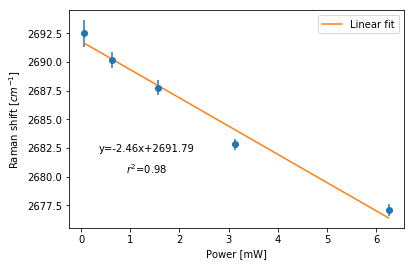

In [7]:
cen=[cen_1,cen_10,cen_25,cen_50,cen_100]
err=[err_1,err_10,err_25,err_50,err_100]
inten=[1, 10, 25, 50, 100]
power=[]

for i in range(len(inten)):
    res=inten[i]*6.25/100
    power.append(float(res))

power = np.asarray(power)
power =power.reshape(-1, 1)

lineal = LinearRegression() 
lineal.fit(power, cen) 
w = lineal.coef_
b = "{0:.2f}".format(lineal.intercept_)
r2 = "{0:.2f}".format(lineal.score(power, cen))
#print(r2)

fig, ax = plt.subplots()
ax.errorbar(power, cen, yerr=err,fmt='o')
ax.plot(power, float(lineal.intercept_)+float(lineal.coef_)*power,label='Linear fit')
ax.set_xlabel('Power [mW]')
ax.set_ylabel('Raman shift [$cm^{-1}$]')
ax.legend()
ax.annotate('y='+str("{0:.2f}".format(w[0]))+'x+'+str(b),
            xy=(0.15, 0.25), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')
ax.annotate('$r^{2}$='+str(r2),
            xy=(0.23, 0.15), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='left',
            verticalalignment='bottom')
fig.savefig('Raman_C1_fit_2d.png',dpi=199)